# Machine Learning Tutorial Python - 2: Linear Regression Single Variable

In [50]:
# Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('data/regressiondata1.csv')

In [35]:
data

,Waist_cm,Weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


In [36]:
data.shape

(15, 2)

<function matplotlib.pyplot.show(*args, **kw)>

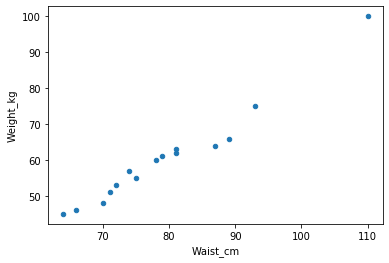

In [37]:
data.plot(kind='scatter', x='Waist_cm', y='Weight_kg')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

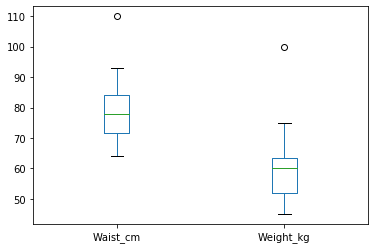

In [38]:
data.plot(kind='box')
plt.show

In [39]:
data.corr() # Correlation coeficients

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.981216
Weight_kg,0.981216,1.000000


In [40]:
Waist = pd.DataFrame(data['Waist_cm'])
Weight = pd.DataFrame(data['Weight_kg'])

In [41]:
# Build linear regression model

# Importing the linear model
from sklearn.linear_model import LinearRegression

# Instantiation of the model
lm = LinearRegression()

# Fitting the model
model = lm.fit(Waist, Weight)


In [42]:
model.coef_

array([[1.13470708]])

In [43]:
model.intercept_

array([-29.62009537])

In [44]:
model.score(Waist, Weight) # Evaluate the model

0.9627843958606758

In [63]:
# Predict new values of Weight
Waist_new = 97
Weight_predict = model.predict([[Waist_new]]) # use reg.predict([[97]]) instead of reg.predict(3300) as api specification has changed.
Weight_predict

array([[80.44649183]])

In [66]:
# Predict more values
X = ([67, 78, 94])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X,Y], axis=1, keys=['Waist_new_cm', 'Weight_Predicted_kg'])
df

,Waist_new_cm,Weight_Predicted_kg
,0,0
0,67,46.405279
1,78,58.887057
2,94,77.042371


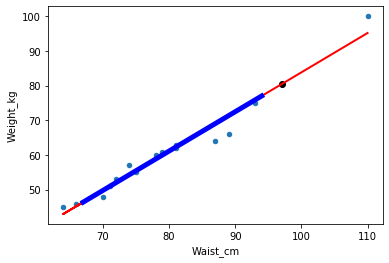

In [72]:
# Visualize the result
data.plot(kind='scatter', x='Waist_cm', y='Weight_kg')

# Plotting the regression line
plt.plot(Waist, model.predict(Waist), color='red', linewidth=2)

# Plotting the predict value (just the point)
plt.scatter(Waist_new, Weight_predict, color='black')

# Plotting the predict values (more values)
plt.plot(X, Y, color='blue', linewidth=5)


plt.show()

# Machine Learning Tutorial Python - 2: Linear Regression Single Variable

In [75]:
homeprice = pd.read_csv('data/homeprices.csv')
homeprice

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


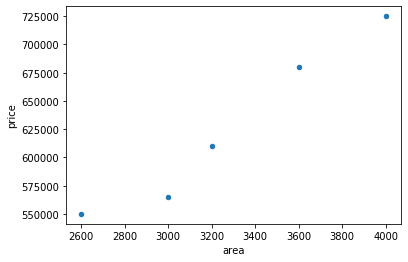

In [80]:
# You done have to put plt.show if you use this!
%matplotlib inline 
homeprice.plot(kind='scatter', x='area', y='price')

In [81]:
# Splitting the data
X = homeprice.drop('price', axis=1)
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [83]:
y = homeprice['price']
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [84]:
# Instanciation of the linear regression object
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**(1). Predict price of a home with area = 44000 sqr ft**

In [85]:
reg.predict([[44000]])

array([6155273.97260274])

In [89]:
reg.coef_

array([135.78767123])

In [90]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [91]:
135.78767123 * 44000 + 180616.43835616432

6155273.972476164

In [108]:
area_df = [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]
area_df = pd.DataFrame(area_df)
area_df.columns = ['area']
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [109]:
price_pred = reg.predict(area_df)
price_pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [110]:
area_df['prices'] = price_pred
area_df.head(3)

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [114]:
area_df.to_csv('data/predictions.csv')

In [115]:
pd.read_csv('data/predictions.csv')

,Unnamed: 0,area,prices
0,0,1000,3.164041e+05
1,1,1500,3.842979e+05
2,2,2300,4.929281e+05
3,3,3540,6.613048e+05
4,4,4120,7.400616e+05
5,5,4560,7.998082e+05
6,6,5490,9.260908e+05
7,7,3460,6.504418e+05
8,8,4750,8.256079e+05
9,9,2300,4.929281e+05


# Exercise: PIB PER CAPITA(GDP) SPAIN

In [137]:
pib_per_capita = pd.read_csv('data/pibpercapita.csv')

In [138]:
pib_per_capita.sort_values(by=['year'], inplace=True)

In [139]:
pib_per_capita.head()

,year,pib_per_capita
39,1980,4227
38,1981,4576
37,1982,4996
36,1983,4778
35,1984,5410


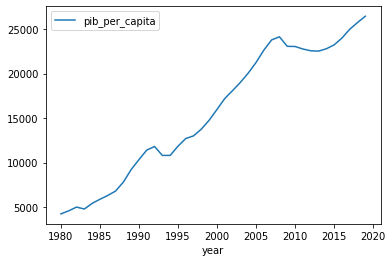

In [140]:
pib_per_capita.plot(kind='line', x='year', y='pib_per_capita')

In [147]:
X = pib_per_capita.drop('pib_per_capita', axis=1)
X.head()

,year
39,1980
38,1981
37,1982
36,1983
35,1984


In [149]:
y = pib_per_capita['pib_per_capita']
y.head()

39    4227
38    4576
37    4996
36    4778
35    5410
Name: pib_per_capita, dtype: int64

In [150]:
regpib = LinearRegression()
regpib.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predict de PIB PER CAPITA OF 2020 IN SPAIN**

In [151]:
regpib.predict([[2020]])

array([28208.65769231])

In [154]:
regpib.coef_

array([614.67232645])

In [155]:
regpib.intercept_

-1213429.4417448407

###                  Y = 614.67232645·year - 1213429.4417448407

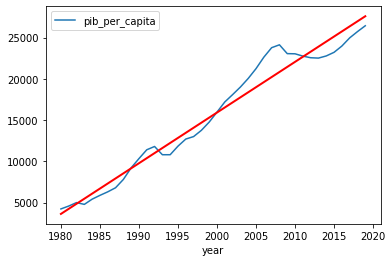

In [153]:
# Plotting the linear regresion line
pib_per_capita.plot(kind='line', x='year', y='pib_per_capita')
plt.plot(X, regpib.predict(X), color='red', linewidth=2)

In [157]:
# Predict more values
X = ([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028])
X = pd.DataFrame(X)
Y = regpib.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X,Y], axis=1, keys=['year', 'pib_per_capita'])
df

,year,pib_per_capita
,0,0
0,2020,28208.657692
1,2021,28823.330019
2,2022,29438.002345
3,2023,30052.674672
4,2024,30667.346998
5,2025,31282.019325
6,2026,31896.691651
7,2027,32511.363977
8,2028,33126.036304
